<a href="https://colab.research.google.com/github/abhinav-sharma-6167/Advanced-ML/blob/main/CreditDefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('creditdata.csv')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['default payment next month','ID'],axis=1),df['default payment next month'],test_size = 0.33)

In [ ]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
3094,150000,2,1,1,44,-1,-1,-1,-2,-2,-2,1843,1367,0,0,0,0,1367,0,0,0,0,0
25845,230000,2,2,1,45,-1,-1,-1,-1,-1,-1,416,416,416,416,416,416,416,416,416,416,416,572
4865,200000,2,2,2,40,0,0,0,0,0,0,99729,139201,155871,193666,216666,18871,59201,35000,54461,46666,18871,0
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
5888,180000,1,2,1,37,-1,-1,-1,-1,0,0,14480,33915,5198,13263,6817,4188,34045,5217,13263,6000,1000,4085


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        keras.Input(shape=(23)),
        layers.Dense(1000, activation="relu"),
        layers.Dense(2500, activation="relu"),
        layers.Dense(2500, activation="relu"),
        layers.Dense(2500, activation="relu"),
        layers.Dense(1000, activation="relu"),
        layers.Dense(500,  activation="relu"),
        layers.Dense(1,    activation='softmax'),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1000)              24000     
                                                                 
 dense_15 (Dense)            (None, 2500)              2502500   
                                                                 
 dense_16 (Dense)            (None, 2500)              6252500   
                                                                 
 dense_17 (Dense)            (None, 2500)              6252500   
                                                                 
 dense_18 (Dense)            (None, 1000)              2501000   
                                                                 
 dense_19 (Dense)            (None, 500)               500500    
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
import warnings
warnings.filterwarnings('ignore')

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.0001),
    metrics=["acc"],
)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, verbose=1,validation_split=0.33,callbacks=[callback])

Epoch 1/100
421/421 [==============================] - 8s 17ms/step - loss: 13.0982 - acc: 0.2240 - val_loss: 2.5081 - val_acc: 0.2178
Epoch 2/100
421/421 [==============================] - 7s 17ms/step - loss: 2.6611 - acc: 0.2240 - val_loss: 2.2781 - val_acc: 0.2178
Epoch 3/100
421/421 [==============================] - 7s 17ms/step - loss: 1.1999 - acc: 0.2240 - val_loss: 0.7676 - val_acc: 0.2178
Epoch 4/100
421/421 [==============================] - 7s 16ms/step - loss: 0.7796 - acc: 0.2240 - val_loss: 0.5920 - val_acc: 0.2178
Epoch 5/100
421/421 [==============================] - 7s 16ms/step - loss: 0.6601 - acc: 0.2240 - val_loss: 0.7724 - val_acc: 0.2178
Epoch 6/100
421/421 [==============================] - 7s 17ms/step - loss: 0.6162 - acc: 0.2240 - val_loss: 0.5962 - val_acc: 0.2178
Epoch 7/100
421/421 [==============================] - 7s 17ms/step - loss: 0.6001 - acc: 0.2240 - val_loss: 0.6395 - val_acc: 0.2178
Epoch 8/100
421/421 [==============================] - 7s 17m

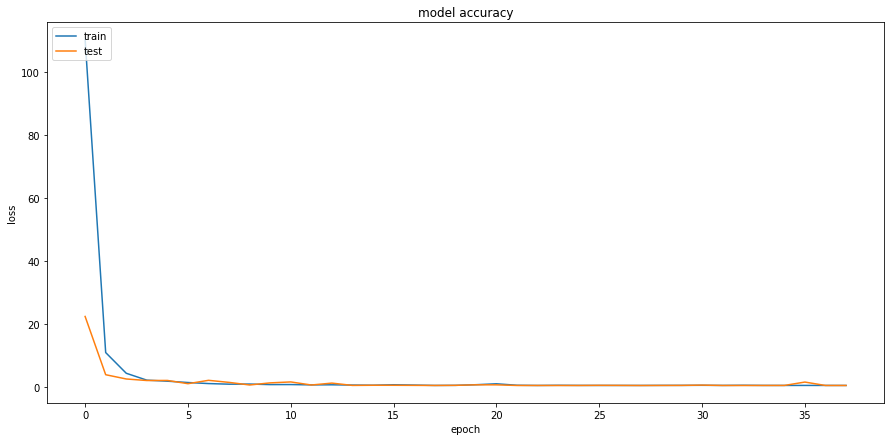

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_train,y_train,batch_size=64)

315/315 [==============================] - 2s 7ms/step - loss: 0.5295 - acc: 0.7782


[0.5294855237007141, 0.7781592011451721]

In [ ]:
model.evaluate(X_test,y_test,batch_size=64)

155/155 [==============================] - 1s 7ms/step - loss: 0.5263 - acc: 0.7804


[0.5262657403945923, 0.7804040312767029]

In [ ]:
pip install shap

In [ ]:
'''import shap
explainer = shap.DeepExplainer(model , X_test)
shap_values = explainer.shap_values(pool)

#max_display needed to show more than 20 features
shap.summary_plot(shap_values, X_new_train, max_display = len(X_new_train.columns))
'''

'import shap\nexplainer = shap.DeepExplainer(model , X_test)\nshap_values = explainer.shap_values(pool)\n\n#max_display needed to show more than 20 features\nshap.summary_plot(shap_values, X_new_train, max_display = len(X_new_train.columns))\n'

In [ ]:
pip install lime

In [ ]:
import lime.lime_tabular as limtab

In [ ]:
test_input = np.array(X_test.iloc[0,:])
test_input

array([500000,      2,      2,      2,     39,      0,      0,      0,
            0,      0,     -1, 229332, 161360, 117606,  18343,  15737,
       203291,   7400,   6000,   1889,   3781, 208122,   6084])

In [ ]:
explainer = limtab.LimeTabularExplainer(np.array(X_train), feature_names=list(X_train.columns), class_names=[0, 1], mode='classification')
# added top_labels=1
exp = explainer.explain_instance(test_input, model.predict, num_features=23, top_labels=1)

In [ ]:
exp.as_list()

KeyError: ignored

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

KeyError: ignored